In [605]:
import numpy as np #used to generate random numbers
import pandas as pd #used to store data in a dataframeimport matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [606]:
#load the    CSV    file into a pandas dataframe
df = pd.read_csv('heart.csv')

In [607]:
df = pd.DataFrame(df)

In [608]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [609]:
import matplotlib.pyplot as plt

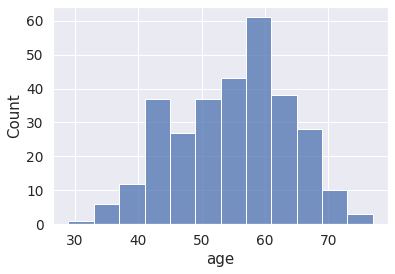

In [610]:
sns.histplot(data=df,x='age')

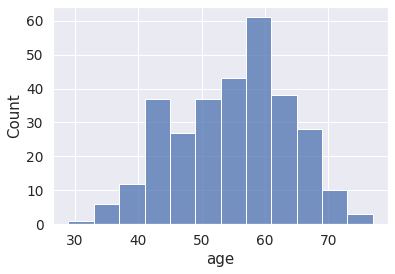

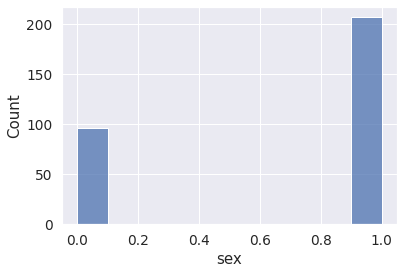

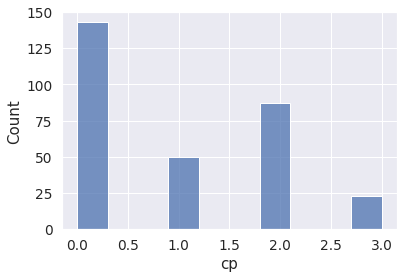

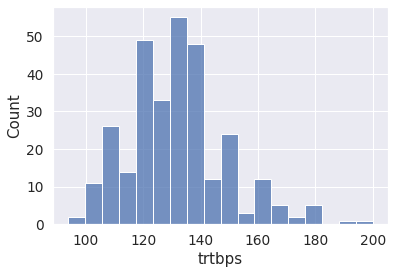

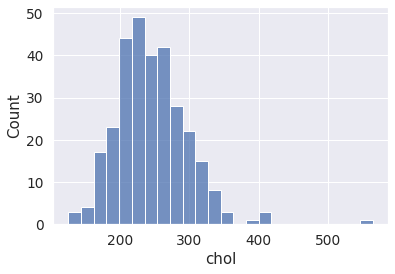

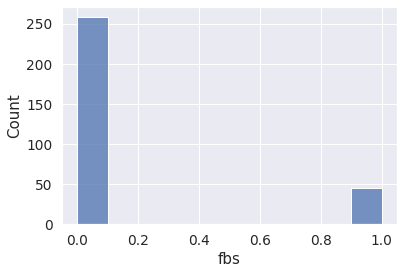

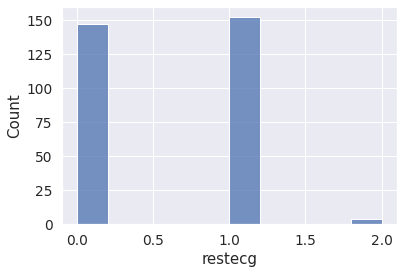

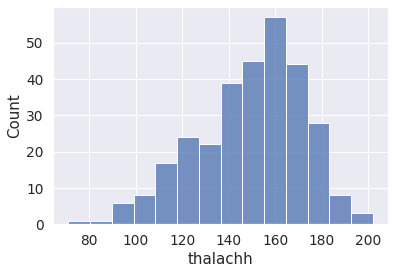

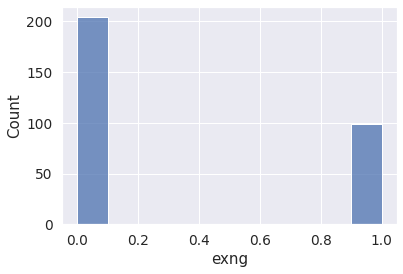

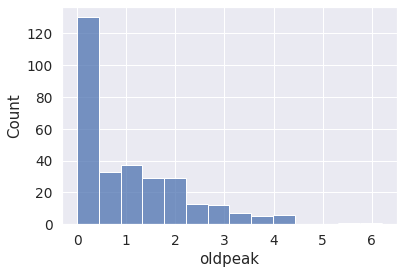

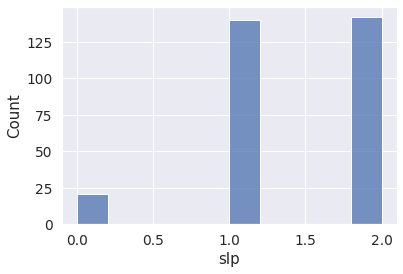

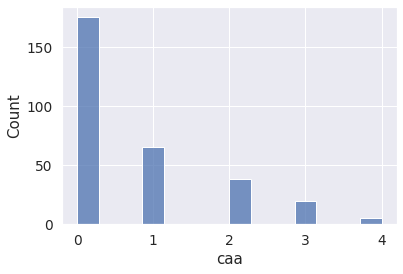

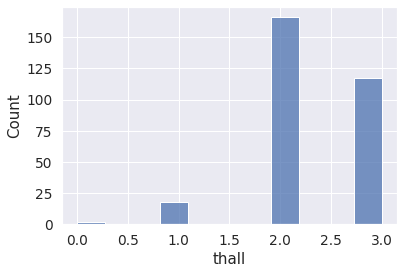

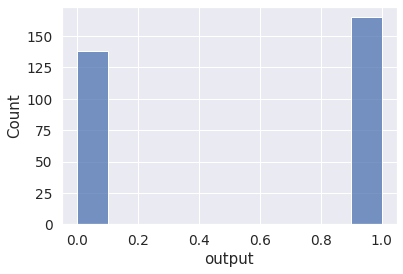

In [611]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

In [612]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y


In [613]:
df.trtbps = normalize(df.trtbps)

In [614]:
df.chol = normalize(df.chol)

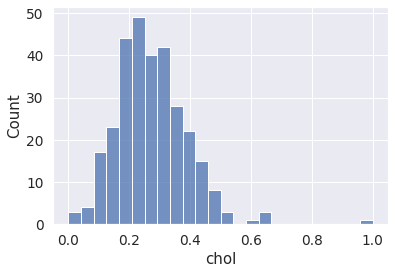

In [615]:
sns.histplot(data=df,x='chol')

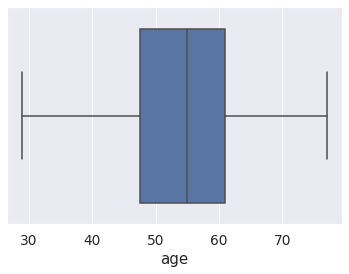

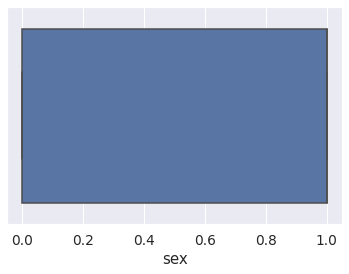

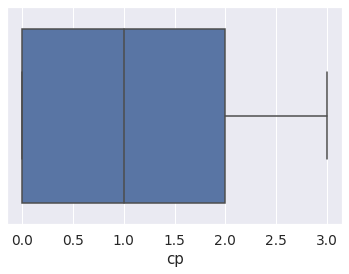

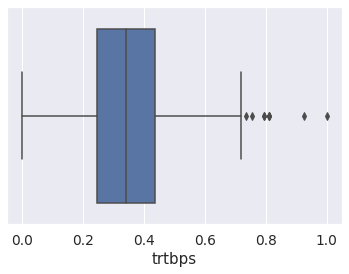

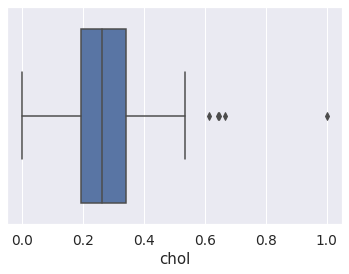

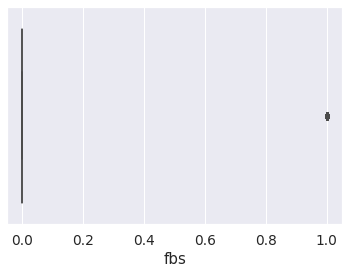

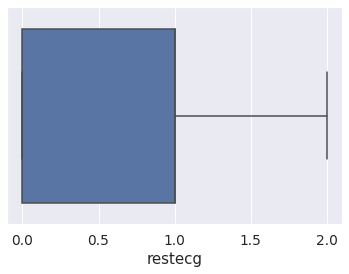

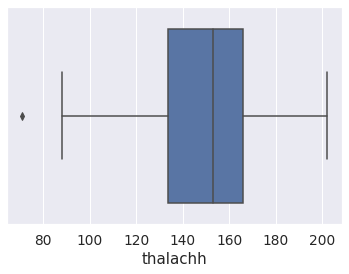

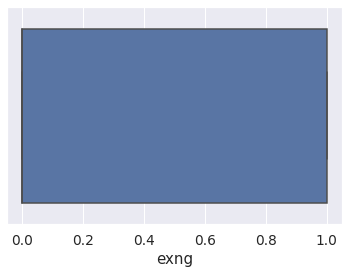

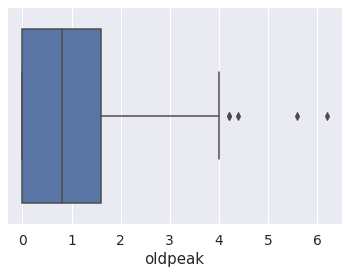

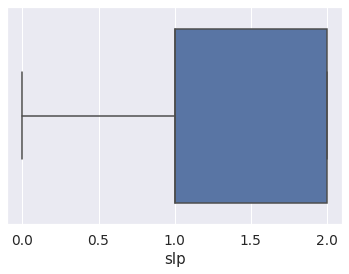

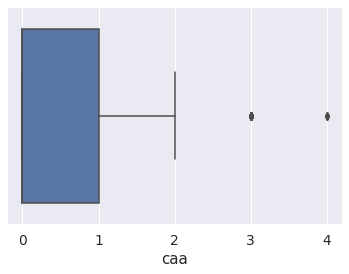

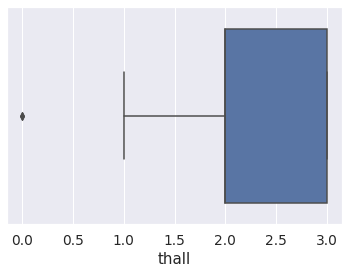

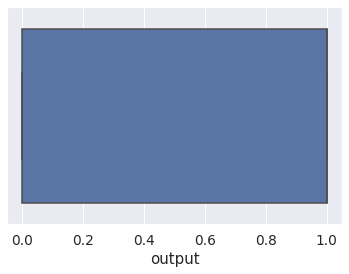

In [616]:
for x in df.columns:
  plt.figure()
  sns.boxplot(x=df[x])

Normalize all variables.
Replace outliers with IQR for:
  trtbps, oldpeak, and caa

In [617]:
df.age = normalize(df.age)
df.cp = normalize(df.cp)
df.restecg = normalize(df.restecg)
df.thalachh = normalize(df.thalachh)
df.oldpeak = normalize(df.oldpeak)
df.slp = normalize(df.slp)
df.caa = normalize(df.caa)
df.thall = normalize(df.thall)

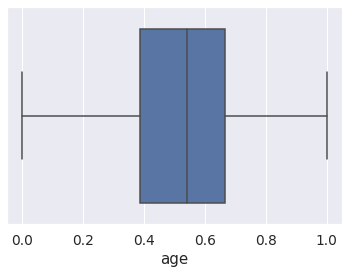

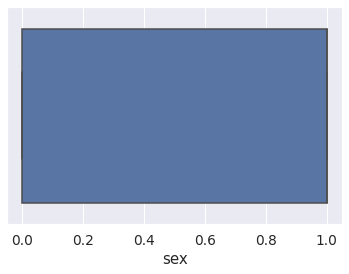

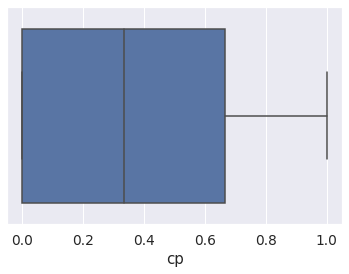

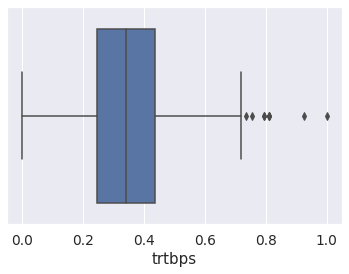

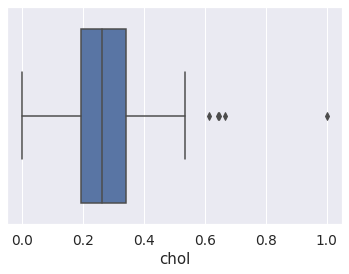

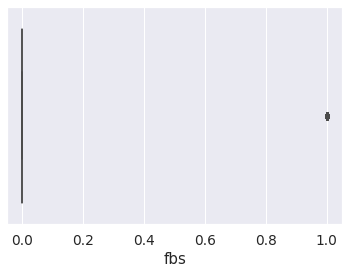

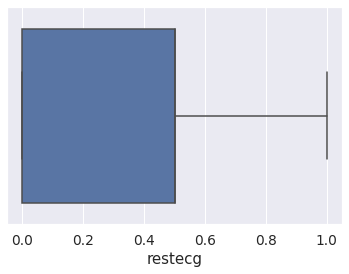

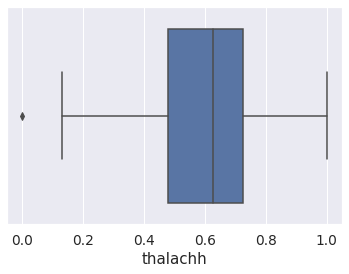

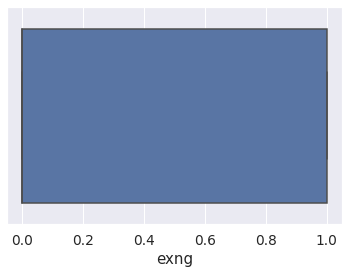

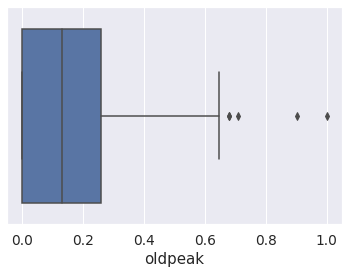

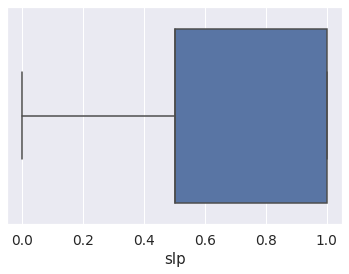

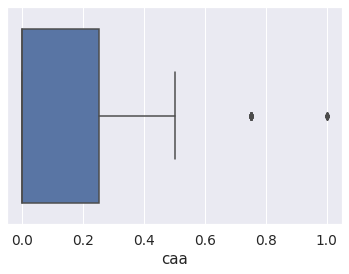

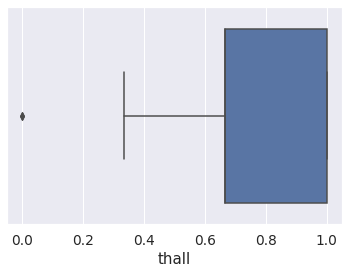

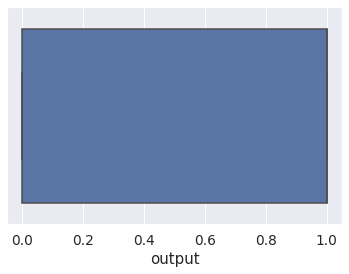

In [618]:
for x in df.columns:
  plt.figure()
  sns.boxplot(x=df[x])

Replace Outliers in Chol with IQR

In [619]:
Q1_chol = df.chol.quantile(0.25)
Q3_chol = df.chol.quantile(0.75)
IQR = Q3_chol - Q1_chol
print(IQR)

0.14497716894977172


In [620]:
df.chol = df.chol[~((df.chol < (Q1_chol - 1.5 * IQR)) |(df.chol > (Q3_chol + 1.5 * IQR)))]

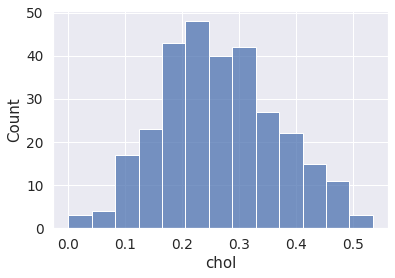

In [621]:
sns.histplot(data=df,x='chol')

Replace Outliers in trtbps with IQR

In [622]:
Q1_trtbps = df.trtbps.quantile(0.25)
Q3_trtbps = df.trtbps.quantile(0.75)
IQR = Q3_trtbps - Q1_trtbps
print(IQR)

0.18867924528301888


In [623]:
df.trtbps = df.trtbps[~((df.trtbps < (Q1_trtbps - 1.5 * IQR)) |(df.trtbps > (Q3_trtbps + 1.5 * IQR)))]

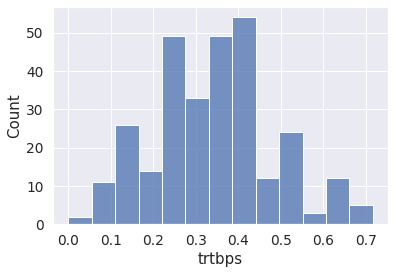

In [624]:
sns.histplot(data=df,x='trtbps')

Replace outliers in oldpeak with IQR

In [625]:
Q1_oldpeak = df.oldpeak.quantile(0.25)
Q3_oldpeak = df.oldpeak.quantile(0.75)
IQR = Q3_oldpeak - Q1_oldpeak
print(IQR)

0.25806451612903225


In [626]:
df.oldpeak = df.oldpeak[~((df.oldpeak < (Q1_oldpeak - 1.5 * IQR)) |(df.oldpeak > (Q3_oldpeak + 1.5 * IQR)))]

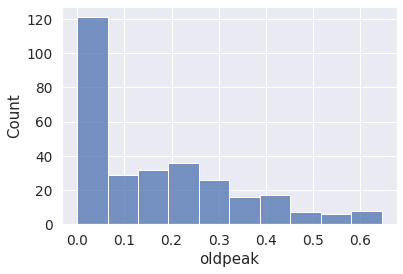

In [627]:
sns.histplot(data=df,x='oldpeak')

Replace outliers in caa with IQR

In [628]:
Q1_caa = df.caa.quantile(0.25)
Q3_caa = df.caa.quantile(0.75)
IQR = Q3_caa - Q1_caa
print(IQR)

0.25


In [629]:
df.caa = df.caa[~((df.caa < (Q1_caa - 1.5 * IQR)) |(df.caa > (Q3_caa + 1.5 * IQR)))]

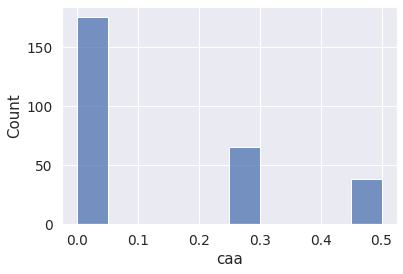

In [630]:
sns.histplot(data=df,x='caa')

Heatmap correlation matrix

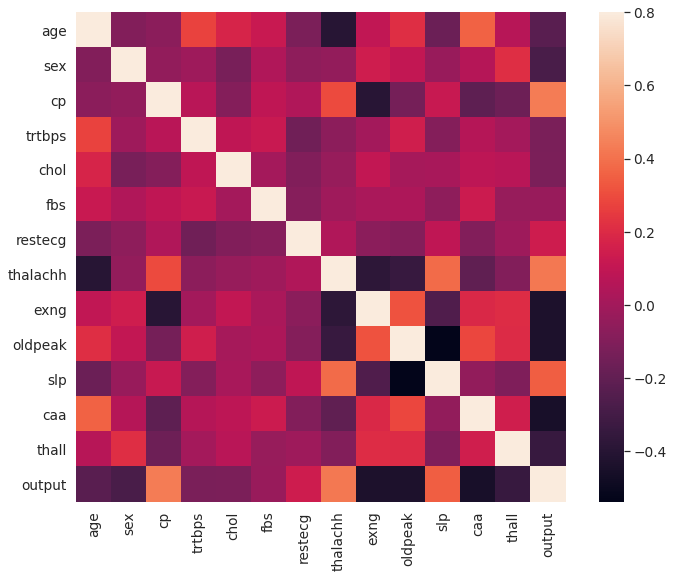

In [631]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

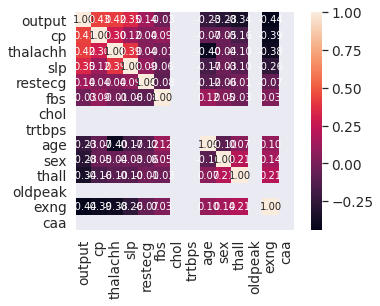

In [632]:
#saleprice correlation matrix
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'output')['output'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [633]:
#scatterplot
#sns.set()
#cols = df.columns
#sns.pairplot(df[cols], size = 2.5)
#plt.show();

Missing Data Inquiry

In [634]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
caa,25,0.082508
trtbps,9,0.029703
oldpeak,5,0.016502
chol,5,0.016502
output,0,0.000000
thall,0,0.000000
slp,0,0.000000
exng,0,0.000000
thalachh,0,0.000000
restecg,0,0.000000


In [635]:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [636]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
output,0,0.0
thall,0,0.0
caa,0,0.0
slp,0,0.0
oldpeak,0,0.0
exng,0,0.0
thalachh,0,0.0
restecg,0,0.0
fbs,0,0.0
chol,0,0.0


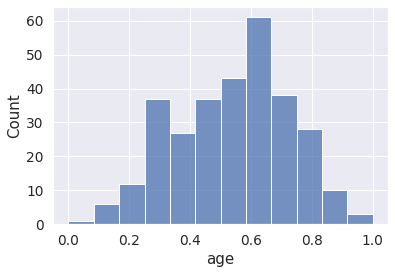

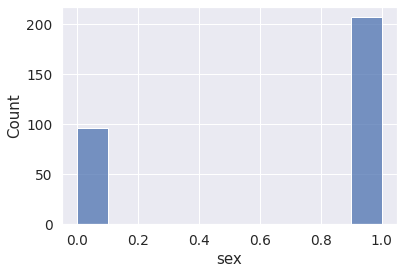

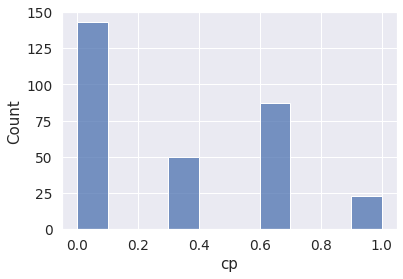

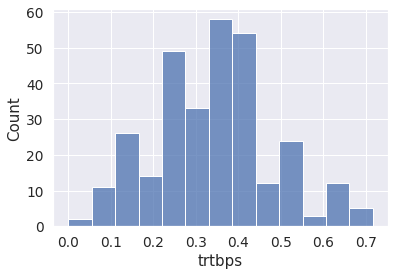

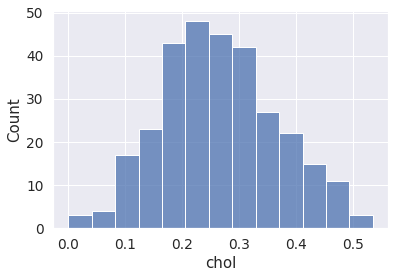

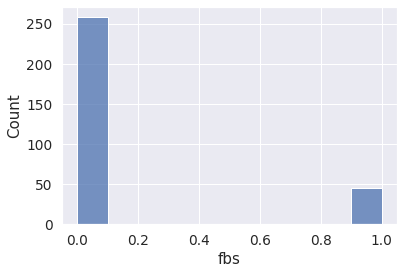

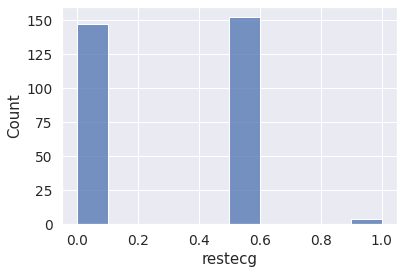

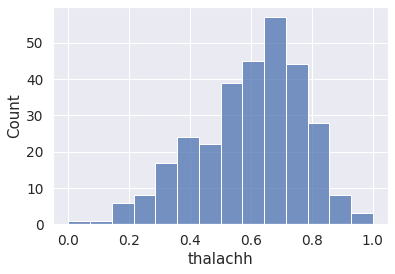

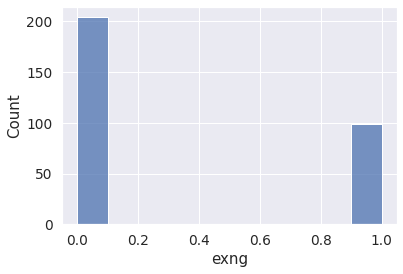

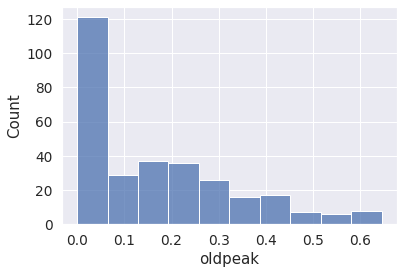

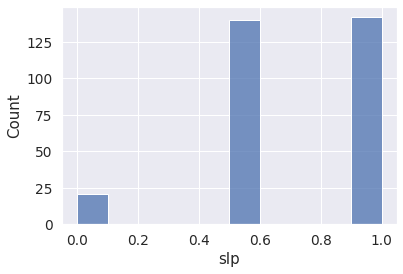

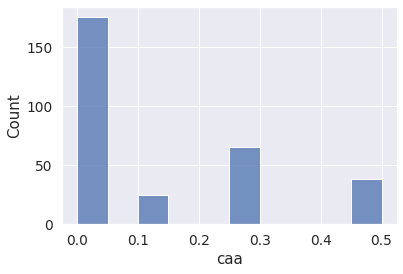

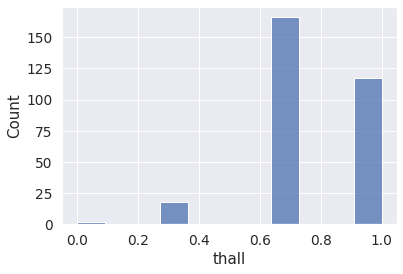

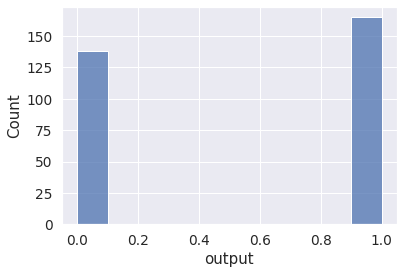

In [637]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

Partition cleaned dataset

In [638]:
from sklearn.model_selection import train_test_split

In [639]:
from sklearn.linear_model import LogisticRegression

In [640]:
from numpy import array

In [641]:
X = df.output

In [642]:
y = df.drop("output",1)

In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [644]:
X_train = np.reshape(X_train.values, (-1, 1))

In [645]:
X_test = np.reshape(X_test.values, (-1, 1))

In [646]:
regressor = LogisticRegression().fit(y_train, X_train)

In [647]:
predictions = regressor.predict(y_test)

In [648]:
score = regressor.score(y_test,X_test)
print(round(score,2))

0.81


In [649]:
df_test = pd.DataFrame()

In [650]:
df_test['Predicted'] = predictions

In [651]:
df_test['Actual'] = X_test

In [652]:
df_test

,Predicted,Actual
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
86,0,0
87,1,1
88,1,1
89,0,1


In [653]:
cross_tab = pd.crosstab(df_test.Predicted,df_test.Actual)

In [654]:
cross_tab

Actual,0,1
Predicted,,
0,33,9
1,8,41


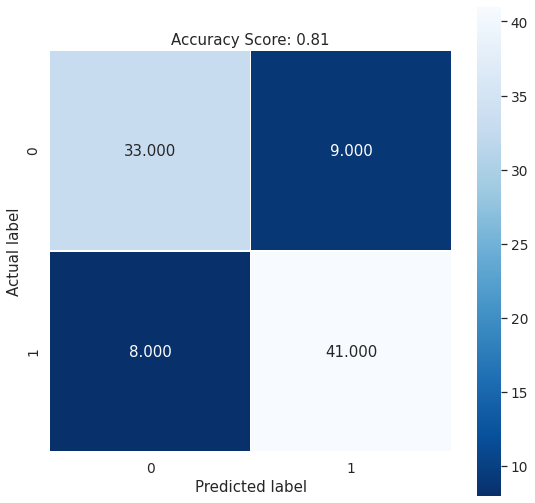

In [655]:
plt.figure(figsize=(9,9))
sns.heatmap(cross_tab, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score,2))
plt.title(all_sample_title, size = 15);